# ML Assignment – 2

## Part B: Building a Basic Neural Network for Image Classification

In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np


In [2]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()


In [3]:
X_train.shape

(60000, 28, 28)

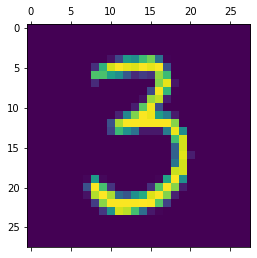

In [4]:
plt.matshow(X_train[50])


In [5]:
X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_test_flattened = X_test.reshape(len(X_test), 28*28)

In [6]:
X_train_flattened.shape

(60000, 784)

In [23]:
model = keras.Sequential([
    keras.layers.Dense(150, input_shape=(784,), activation='relu'),
    keras.layers.Dense(150, input_shape=(784,), activation='relu'),
    keras.layers.Dense(150, input_shape=(784,), activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flattened, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 2s 1ms/step - loss: 1.0711 - accuracy: 0.8822
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2274 - accuracy: 0.9383
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1722 - accuracy: 0.9517
Epoch 4/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1480 - accuracy: 0.9584
Epoch 5/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1231 - accuracy: 0.9645
Epoch 6/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1089 - accuracy: 0.9697
Epoch 7/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0925 - accuracy: 0.9742
Epoch 8/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0899 - accuracy: 0.9758
Epoch 9/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0838 - accuracy: 0.9779
Epoch 10/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.069

### Confusion Matrix

In [24]:
y_predicted = model.predict(X_test_flattened)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

313/313 [==============================] - 0s 712us/step


### Accuracy

In [25]:
def acc(confusion):
    sum=0
    for i in range(10):
        sum=sum+cm[i,i]
    accuracy = sum/10000
    return accuracy

In [26]:
print(acc(cm))

tf.Tensor(0.9667, shape=(), dtype=float64)


### Visualising Confusion Matrix

Text(69.0, 0.5, 'Truth')

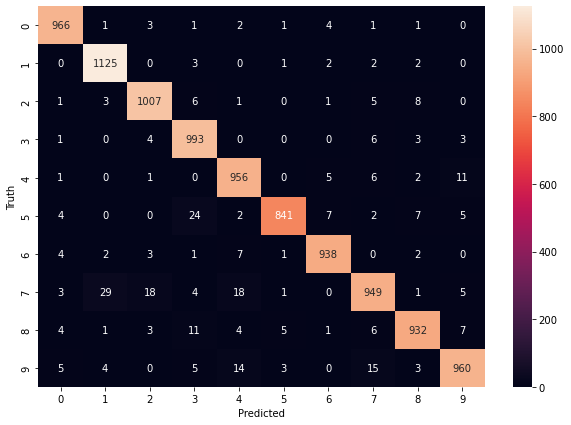

In [27]:
import seaborn as sn

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

# Comparative Study of 15 models 

| Model No. | Hidden Layer(No.) | Neuron in 1st layer | Neuron in 2nd layer | Neuron in 3rd layer | Activation func. in 1st layer |  Activation func. in 2nd layer | Activation func. in 3rd layer |
| -:| -: | :-: | :-: | :-: | :-: | :-: | :-: |
| 1 | 2 | 100 | 100 | - | tanh | tanh | - |
| 2 | 2 | 100 | 150 | - | tanh | sigmoid | - |
| 3 | 2 | 150 | 150 | - | tanh | ReLu | - | :-: |
| 4 | 2 | 100 | 100 | - | sigmoid | sigmoid | - |
| 5 | 2 | 150 | 100 | - | sigmoid | ReLu | - |
| 6 | 2 | 150 | 150 | - | ReLu | ReLu | - |
| 7 | 3 | 100 | 100 | 100 | tanh | tanh | tanh |
| 8 | 3 | 100 | 100 | 100 | ReLu | tanh | tanh |
| 9 | 3 | 150 | 100 | 100 | ReLu | ReLu | tanh |
| 10 | 3 | 150 | 100 | 100 | sigmoid | tanh | tanh |
| 11 | 3 | 150 | 150 | 100 | sigmoid | sigmoid | tanh |
| 12 | 3 | 150 | 150 | 100 | sigmoid | sigmoid | sigmoid |
| 13 | 3 | 150 | 150 | 150 | ReLu | sigmoid | sigmoid |
| 14 | 3 | 150 | 150 | 150 | ReLu | ReLu | sigmoid |
| 15 | 3 | 150 | 150 | 150 | ReLu | ReLu | ReLu |


| Model No. | Iteration 1 | Iteration 2 | Iteration 3 | Iteration 4 | Iteration 5 | Iteration 6 | Iteration 7 | Iteration 8 | Iteration 9 | Iteration 10 | Final Accuracy
| :-:| -: | :-: | :-: | :-: | :-: | :-: | :-: | :-: | :-: | :-: | :-: |
| 1 | 91.35 | 92.33 | :-: | :-: | :-: | :-: | :-: | :-: | :-: | :-: | :-: |
| 2 | 92.35 | 92.24 | :-: | :-: | :-: | :-: | :-: | :-: | :-: | :-: | :-: |
| 3 | 92.83 | 92.34 | :-: | :-: | :-: | :-: | :-: | :-: | :-: | :-: | :-: |
| 4 | 93.34 | 93.26 | :-: | :-: | :-: | :-: | :-: | :-: | :-: | :-: | :-: |
| 5 | 93.90 | 93.67 | :-: | :-: | :-: | :-: | :-: | :-: | :-: | :-: | :-: |
| 6 | 91.11 | 92.53 | :-: | :-: | :-: | :-: | :-: | :-: | :-: | :-: | :-: |
| 7 | 91.53 | 91.39 | :-: | :-: | :-: | :-: | :-: | :-: | :-: | :-: | :-: |
| 8 | 91.58 | 85.55 | :-: | :-: | :-: | :-: | :-: | :-: | :-: | :-: | :-: |
| 9 | 83.55 | 90.34 | :-: | :-: | :-: | :-: | :-: | :-: | :-: | :-: | :-: |
| 10| 93.59 | 93.24 | :-: | :-: | :-: | :-: | :-: | :-: | :-: | :-: | :-: |
| 11| 93.87 | 93.53 | :-: | :-: | :-: | :-: | :-: | :-: | :-: | :-: | :-: |
| 12| 93.27 | 94.16 | :-: | :-: | :-: | :-: | :-: | :-: | :-: | :-: | :-: |
| 13| 94.00 | 93.00 | :-: | :-: | :-: | :-: | :-: | :-: | :-: | :-: | :-: |
| 14| 94.39 | 94.15 | :-: | :-: | :-: | :-: | :-: | :-: | :-: | :-: | :-: |
| 15| 91.58 | 90.53 | :-: | :-: | :-: | :-: | :-: | :-: | :-: | :-: | :-: |
